<a href="https://colab.research.google.com/github/Rashigarashi/fundamental-of-machine-learning/blob/main/EXP_8a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== AdaBoost with Decision Tree (Stumps) ===
Dataset shape: (569, 30)
Feature names: [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness')]...

Target classes: ['malignant' 'benign']

Training samples: 455, Testing samples: 114

=== Evaluation Metrics ===
Accuracy:  0.9561
Precision: 0.9467
Recall:    0.9861
F1-score:  0.9660
ROC AUC:   0.9868

Confusion Matrix:
[[38  4]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



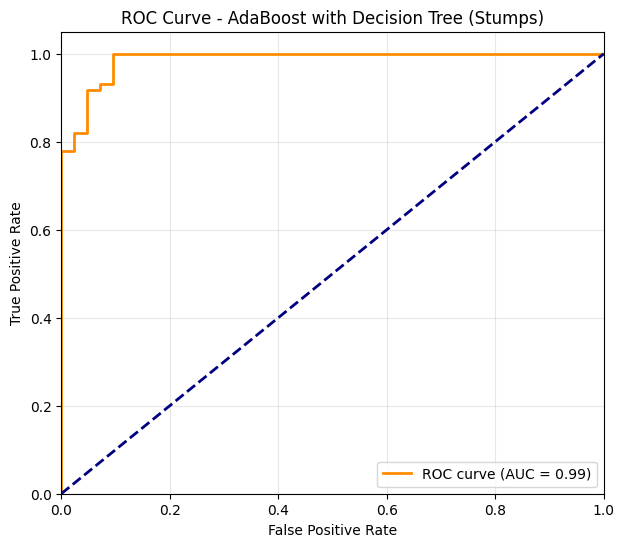

In [1]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)

# ------------------------------------------------------------
# 2. Load the dataset
# ------------------------------------------------------------
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("=== AdaBoost with Decision Tree (Stumps) ===")
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {list(feature_names[:5])}...")
print("\nTarget classes:", target_names)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"\nTraining samples: {len(X_train)}, Testing samples: {len(X_test)}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.8,
    random_state=42
)


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("\n=== Evaluation Metrics ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost with Decision Tree (Stumps)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
